In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import mdtraj as md
import os
import sys
from rdkit import Chem
from rdkit.Chem import rdFMCS
import matplotlib.cm as cm 
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
sys.path.append('/home/xgu/Tiwary/MCS_test/')
from CalcLigRMSD import *
# from pymol import cmd
import gzip
from Bio.PDB import PDBParser
import glob
os.system('pwd')

/home/xgu/Tiwary/S100_clean/dock


0

**Binding Pocket**

In [5]:
pairs = np.loadtxt('/home/xgu/Tiwary/S100_clean/index_pocket.txt')
data = ''
for i in set(np.concatenate(pairs)):
    # data += f'B:{int(i+1)},'  # for AF2, AF2RAVE
    data += f'A:{int(i)},'  # for xrd
data

'A:36,A:43,A:44,A:45,A:46,A:47,A:52,A:55,A:56,A:58,A:59,A:60,A:75,A:76,A:79,A:80,A:84,A:87,A:88,'

In [13]:
glide = "/mnt/c/Users/xgu19/Desktop/S100_clean/Glide_all.sh"
data = []
with open(glide, 'r') as lines:
    for i, line in enumerate(lines):
        data.append(line)
Nfile = len(data)//4 +1
for i in range(Nfile):
    with open(f"/mnt/c/Users/xgu19/Desktop/S100_clean/Glide_{i}.sh", 'w') as out:
        out.writelines(data[i*4:(min(len(data), (i+1)*4))])

[36, 43, 44, 45, 46, 47, 52, 55, 56, 58, 59, 60, 75, 76, 79, 80, 84, 87, 88]

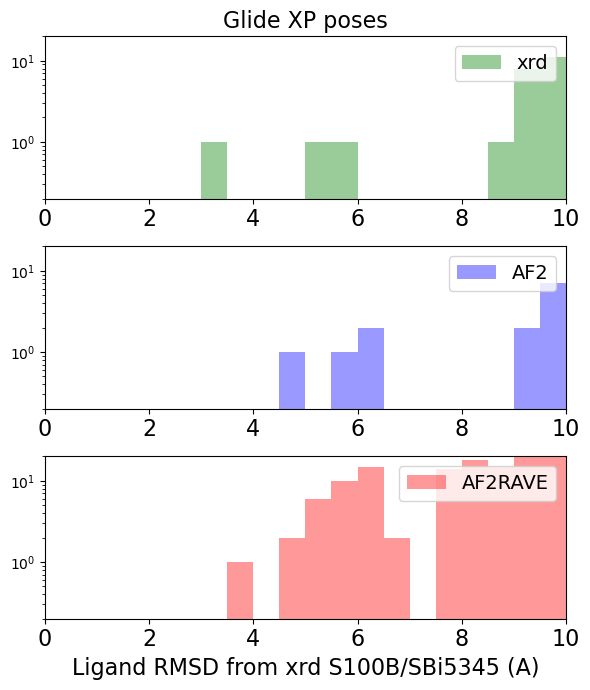

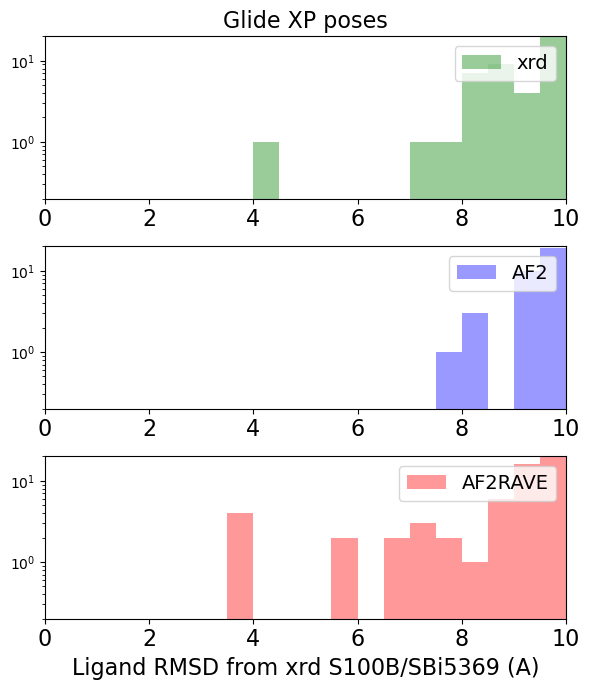

In [2]:
temps = ['INH45', 'LIG69']
bin = np.arange(0,21,0.5)


for temp in temps: 
    fig, axs = plt.subplots(3, 1, figsize=(6, 7))
    # xrd
    frames = glob.glob('dock_*/SB_*_match.csv')
    L_rmsd = []
    for pk, frame in enumerate(frames):        
        match1 = pd.read_csv(frame, header=0, sep=',') 
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd.extend(sub1[f'{temp}_l_RMSD'].tolist())
    axs[0].hist(L_rmsd, color='g', alpha=0.4, bins=bin, label=f'xrd',log=True)
    
    # AF2
    frames = glob.glob('dock_*/AF2_S100B*_match.csv')
    L_rmsd = []
    for pk, frame in enumerate(frames):        
        match1 = pd.read_csv(frame, header=0, sep=',') 
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd.extend(sub1[f'{temp}_l_RMSD'].tolist())
    axs[1].hist(L_rmsd, color='b', alpha=0.4, bins=bin, label=f'AF2',log=True) 
    
    # AF2RAVE
    frames = glob.glob('dock_*/S100B*_match.csv')
    L_rmsd = []
    for pk, frame in enumerate(frames):        
        match1 = pd.read_csv(frame, header=0, sep=',') 
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd.extend(sub1[f'{temp}_l_RMSD'].tolist())
    axs[2].hist(L_rmsd, color='r', alpha=0.4, bins=bin, label=f'AF2RAVE',log=True) 
    
   
    axs[0].set_title('Glide XP poses', fontsize=16)
    for ax in axs:
        ax.set_xlim(0, 10)  # Example x limits
        ax.set_ylim(0.2, 20)  # Example y limits
        ax.set_xticks([0, 2, 4, 6, 8, 10])
        ax.tick_params(axis='x', labelsize=16)
        ax.legend(fontsize=14,loc='upper right')
    axs[2].set_xlabel(f'Ligand RMSD from xrd S100B/SBi53{temp[-2:]} (A)', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"GLide_RMSD_{temp}.png",dpi=300) 

In [3]:
frames = glob.glob('dock_*/SB*_match.csv')
for ii, temp in enumerate(temps): 
    for frame in frames:     
        match1 = pd.read_csv(frame, header=0, sep=',') 
        match1['index'] = match1.index
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd = sub1[f'{temp}_l_RMSD'].tolist()
        print(f'{frame} {temp}', np.min(L_rmsd), sub1.iloc[np.argmin(L_rmsd)]['index'])

dock_coarse_box/SB_45_ca_A_match.csv INH45 11.491045356805309 29
dock_coarse_box/SB_45_ca_B_match.csv INH45 9.98257091625395 13
dock_coarse_box/SB_69_ca_A_match.csv INH45 11.816122631354826 26
dock_coarse_box/SB_69_ca_B_match.csv INH45 10.008226470180986 12
dock_fine_box/SB_45_ca_A_match.csv INH45 10.08953548066938 23
dock_fine_box/SB_45_ca_B_match.csv INH45 5.290506706893611 1
dock_fine_box/SB_69_ca_A_match.csv INH45 3.067580115450267 4
dock_fine_box/SB_69_ca_B_match.csv INH45 5.728014654516252 0
dock_coarse_box/SB_45_ca_A_match.csv LIG69 11.492765089053064 53
dock_coarse_box/SB_45_ca_B_match.csv LIG69 9.435267864065477 27
dock_coarse_box/SB_69_ca_A_match.csv LIG69 4.21455805372702 47
dock_coarse_box/SB_69_ca_B_match.csv LIG69 8.02693187790634 55
dock_fine_box/SB_45_ca_A_match.csv LIG69 9.88569128272044 43
dock_fine_box/SB_45_ca_B_match.csv LIG69 7.465544140498098 32
dock_fine_box/SB_69_ca_A_match.csv LIG69 9.607049106224643 43
dock_fine_box/SB_69_ca_B_match.csv LIG69 7.80415682348132

In [4]:
frames = glob.glob('dock_*/S100B*_match.csv')
temps = ['INH45', 'LIG69']
for ii, temp in enumerate(temps): 
    for frame in frames:     
        match1 = pd.read_csv(frame, header=0, sep=',') 
        match1['index'] = match1.index
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd = sub1[f'{temp}_l_RMSD'].tolist()
        print(f'{frame} {temp}', np.min(L_rmsd), sub1.iloc[np.argmin(L_rmsd)]['index'])

dock_coarse_box/S100B_b0_0_pLDDT_rank1_ca_A_match.csv INH45 9.502679038142915 11
dock_coarse_box/S100B_b0_0_pLDDT_rank1_ca_B_match.csv INH45 11.678923321984108 22
dock_coarse_box/S100B_b0_0_pLDDT_rank2_ca_A_match.csv INH45 12.348628927624183 6
dock_coarse_box/S100B_b0_0_pLDDT_rank2_ca_B_match.csv INH45 5.593509382819186 19
dock_coarse_box/S100B_b0_1_pLDDT_rank1_ca_A_match.csv INH45 8.890184215872969 32
dock_coarse_box/S100B_b0_1_pLDDT_rank1_ca_B_match.csv INH45 12.051011917482038 27
dock_coarse_box/S100B_b0_1_pLDDT_rank2_ca_A_match.csv INH45 11.630860329313563 27
dock_coarse_box/S100B_b0_1_pLDDT_rank2_ca_B_match.csv INH45 7.946754298602226 10
dock_coarse_box/S100B_b0_2_pLDDT_rank1_ca_A_match.csv INH45 11.27313410150825 23
dock_coarse_box/S100B_b0_2_pLDDT_rank1_ca_B_match.csv INH45 11.33094361368331 2
dock_coarse_box/S100B_b0_2_pLDDT_rank2_ca_A_match.csv INH45 11.37441616342674 24
dock_coarse_box/S100B_b0_2_pLDDT_rank2_ca_B_match.csv INH45 12.802679766208264 5
dock_coarse_box/S100B_b0_3

In [5]:
frames = glob.glob('dock_*/AF*_match.csv')
temps = ['INH45', 'LIG69']
for ii, temp in enumerate(temps): 
    for frame in frames:     
        match1 = pd.read_csv(frame, header=0, sep=',') 
        match1['index'] = match1.index
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd = sub1[f'{temp}_l_RMSD'].tolist()
        print(f'{frame} {temp}', np.min(L_rmsd), sub1.iloc[np.argmin(L_rmsd)]['index'])

dock_coarse_box/AF2_S100B_ca_A_match.csv INH45 11.125215258547566 0
dock_coarse_box/AF2_S100B_ca_B_match.csv INH45 12.41943648511651 15
dock_fine_box/AF2_S100B_ca_A_match.csv INH45 4.778299621676084 28
dock_fine_box/AF2_S100B_ca_B_match.csv INH45 9.236955460348966 6
dock_coarse_box/AF2_S100B_ca_A_match.csv LIG69 9.331193006340005 40
dock_coarse_box/AF2_S100B_ca_B_match.csv LIG69 12.515944369122948 40
dock_fine_box/AF2_S100B_ca_A_match.csv LIG69 9.02013006623323 44
dock_fine_box/AF2_S100B_ca_B_match.csv LIG69 7.666252769731231 49


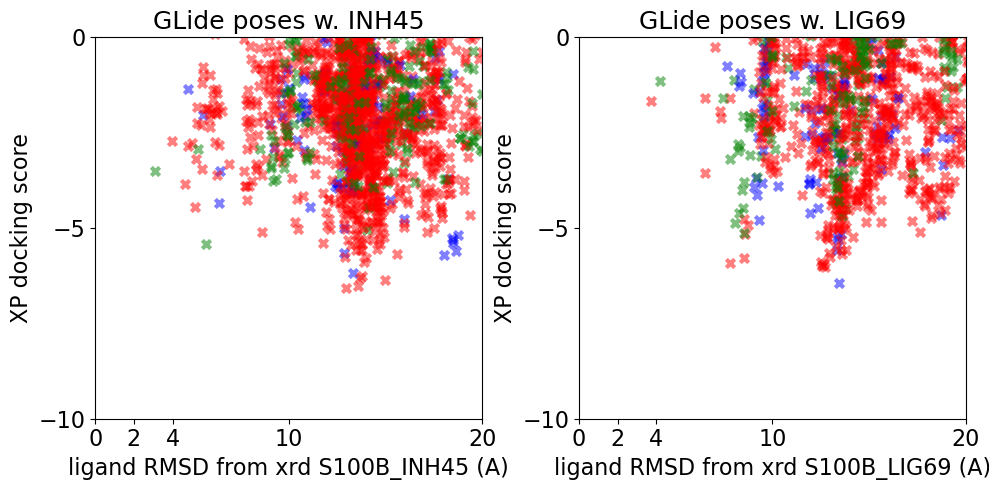

In [9]:
fig=plt.figure(figsize=(10,5))
frames = glob.glob('dock*/*_match.csv')
for ii, temp in enumerate(temps): 
    plt.subplot(1,2,ii+1)
    for frame in frames:
        if frame.split('/')[-1][:2]== 'SB':
            # label = 'S100A1'
            color = 'g'
        elif frame.split('/')[-1][:2]== 'AF':
            # label = 'S100B'
            color = 'b' 
        else:
            color = 'r'
        match1 = pd.read_csv(frame, header=0, sep=',') 
        sub1 = match1[match1['s_m_title'] == temp]
        L_rmsd = sub1[f'{temp}_l_RMSD'].tolist()
        dks = sub1['r_i_docking_score'].tolist()
        
#         match2 = pd.read_csv(f'{frame}_ca_B_match.csv', header=0, sep=',') 
#         sub2 = match2[match2['s_m_title'] == temp]
#         L_rmsd.extend(sub2[f'{temp}_l_RMSD'].tolist())
#         dks.extend(sub2['r_i_docking_score'].tolist())

        
#         plt.plot(dks[np.argmin(L_rmsd)], np.min(L_rmsd),"H",markerfacecolor="none",markeredgecolor=color,markersize=12)
        plt.scatter(L_rmsd, dks, alpha=0.5, marker='x', color=color, linewidth=3, label = f'{frame}')

    
    plt.xlabel(f'ligand RMSD from xrd S100B_{temp} (A)', fontsize=16)
    plt.ylabel('XP docking score', fontsize=16)
    plt.xticks([0,2,4,10,20], fontsize=16)
    plt.yticks([-10,-5,0], fontsize=16)
    plt.ylim(-10,0)
    plt.xlim(0,20)
    plt.title(f"GLide poses w. {temp}", fontsize=18)
    # plt.legend(fontsize=13,loc='lower left')
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
# plt.savefig(f"Glide_dk_vs_lRMSD",dpi=300) 